# ripe or rotten mango?

In this section, we reload modules for immediate code updates, install required dependencies, while also including custom modules for dataset management, image processing and visualization.

In [81]:
%reload_ext autoreload
%autoreload 2
%pip install -q -r ../requirements.txt

import sys
sys.path.append('../')  
from src import get_dataset, preprocess, graphic, classify

Note: you may need to restart the kernel to use updated packages.


This section imports essential libraries for data manipulation, visualization, and dimensionality reduction.

In [2]:
import warnings
import pandas as pd 

warnings.filterwarnings("ignore")
%matplotlib inline

In this section, we load the dataset, create a DataFrame from the training data, and display its shape along with the first five entries for initial inspection and analysis.

In [ ]:
dataset = get_dataset()
train_set = dataset.train_data

train_df = pd.DataFrame(train_set)
print(f"Train dataset shape: {train_df.shape}")

Loaded dataset ../data/raw\train.csv in 0.02 seconds.
Loaded dataset ../data/raw\validation.csv in 0.00 seconds.


(1989, 2)

We initialize the preprocess class with the training dataset to efficiently process and extract features, then organize the processed images into a DataFrame, `features_df`, for subsequent analysis and modeling.

In [67]:
processor = preprocess(train_set)
features_set = processor.features

features_df = pd.DataFrame(features_set)
print(features_df.shape)
features_df.describe()

Loaded dataset ../data/processed\features.csv in 20.61 seconds.
Loaded dataset ../data/processed\pca.csv in 0.02 seconds.
(1989, 776)


,area,label,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
count,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,6.685059e+04,0.249874,181.854046,155.196007,126.786020,26.639887,27.660354,36.437425,0.295123,0.091503,...,25.862242,34.162896,25.896430,33.275013,39.687783,50.937657,53.144796,66.493213,218.011564,874.575163
std,8.864969e+04,0.433049,34.294345,38.557030,45.728988,10.555681,10.600771,17.150335,2.651806,1.208485,...,155.273770,251.887797,101.293353,146.106492,123.184643,469.349899,336.739000,451.837125,1231.088768,4440.192961
min,1.083000e+03,0.000000,76.756836,67.474856,14.339593,3.827603,5.637942,7.884951,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.530400e+04,0.000000,153.235232,130.185822,92.556163,18.003269,20.049799,22.960395,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.800500e+04,0.000000,177.447050,150.294597,128.293459,26.102443,25.818547,34.824957,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.991000e+04,0.000000,205.149231,177.272506,150.121064,32.858022,32.503474,45.783679,0.000000,0.000000,...,7.000000,5.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,3.000000,13.000000
max,1.272680e+06,1.000000,254.209087,253.923098,252.875468,76.380757,104.556292,116.152947,53.000000,45.000000,...,4188.000000,6895.000000,2542.000000,2699.000000,1415.000000,16237.000000,13600.000000,14016.000000,36807.000000,40262.000000


This class provides methods for loading and visualizing image data, displaying histograms, analyzing RGB channel statistics, exploring correlations, and performing PCA on image features in a dataset.

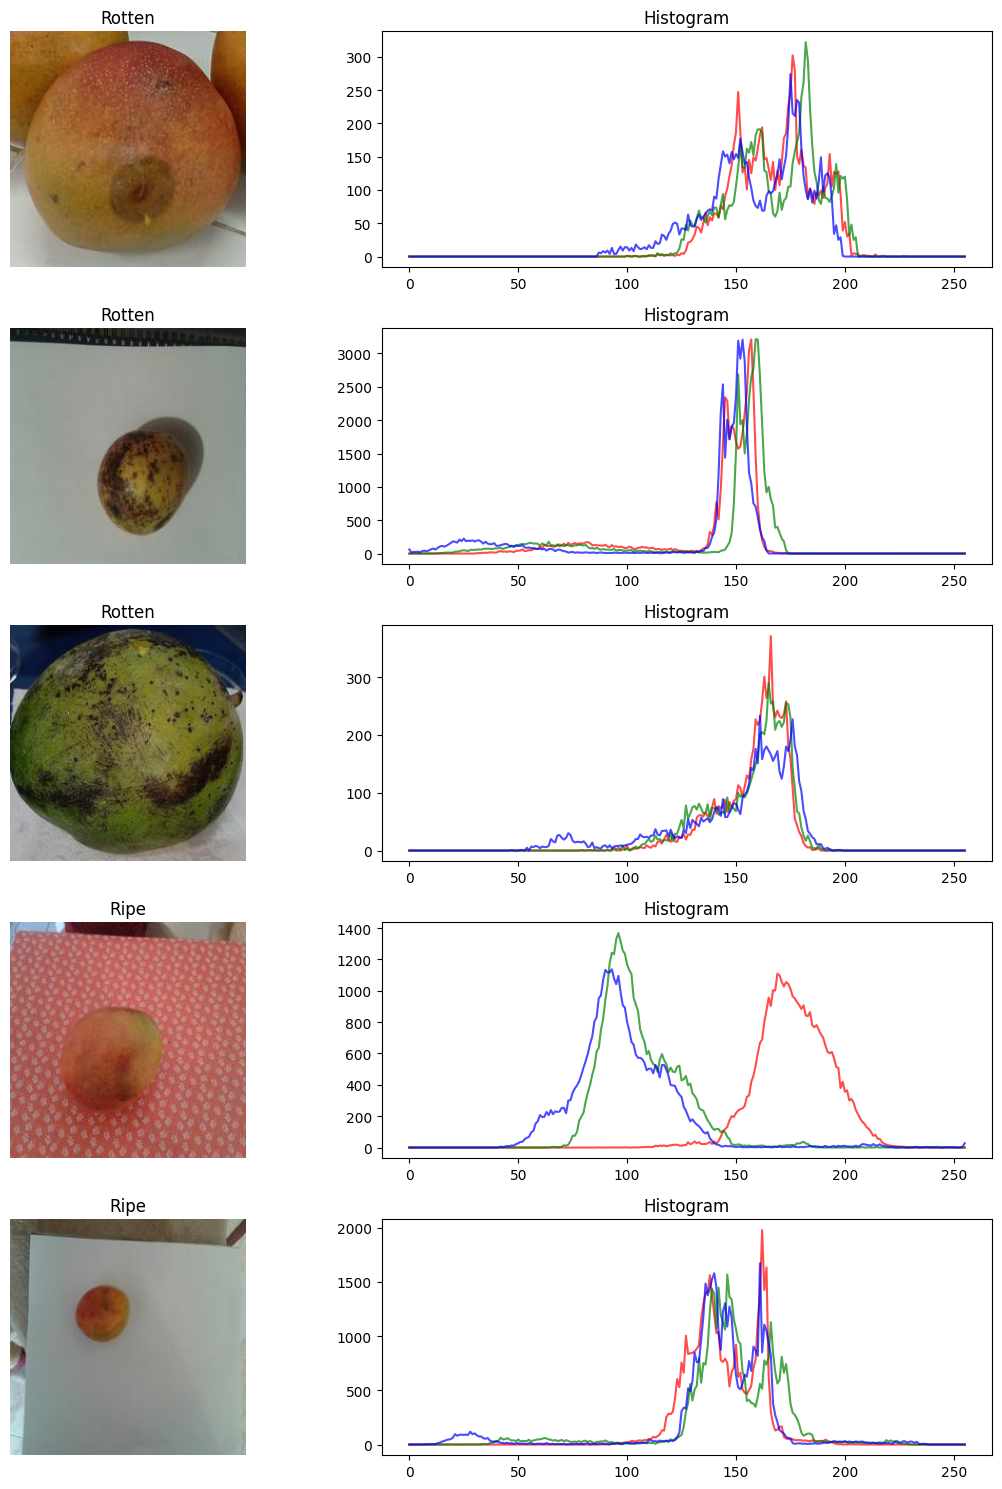

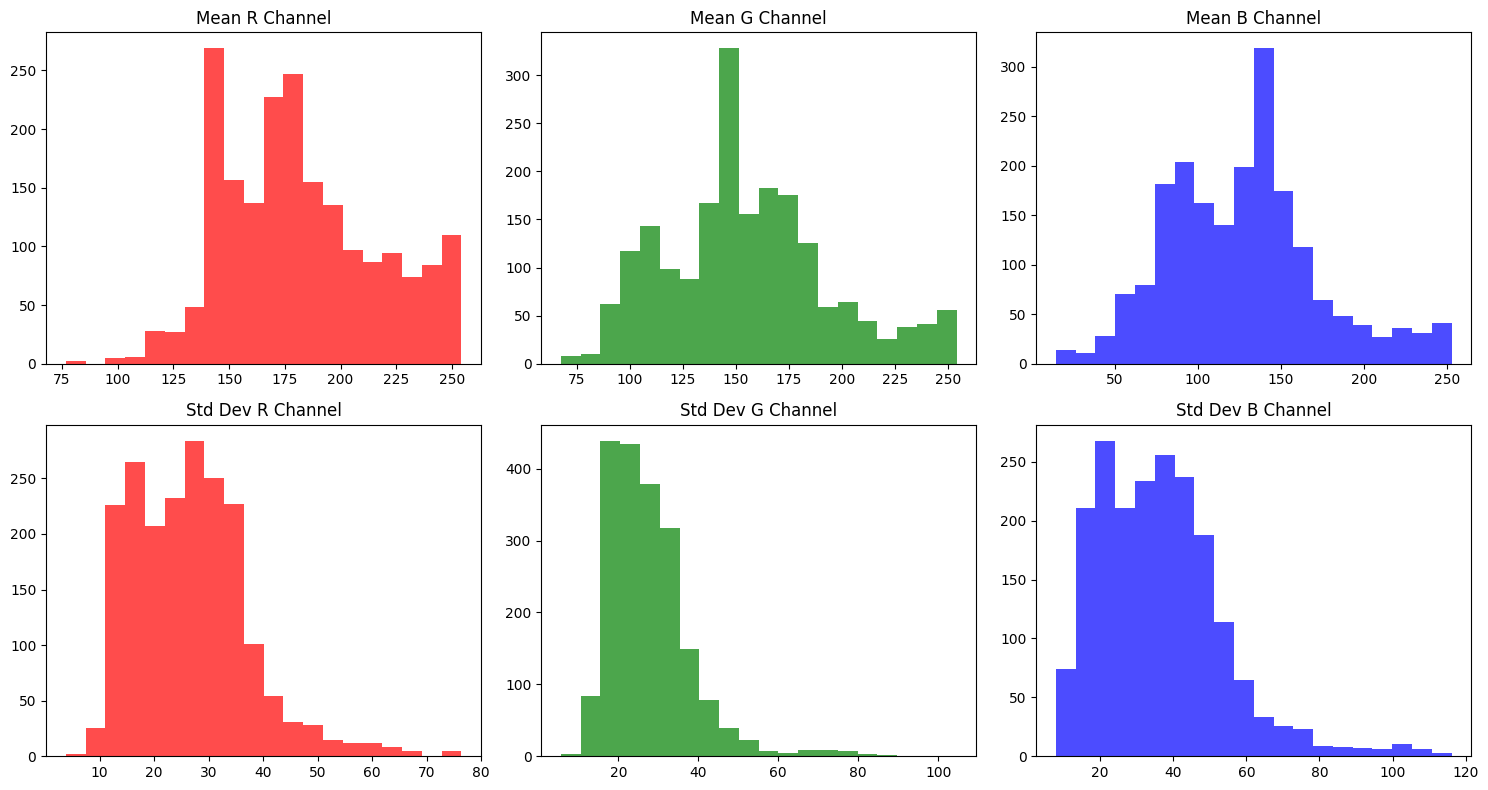

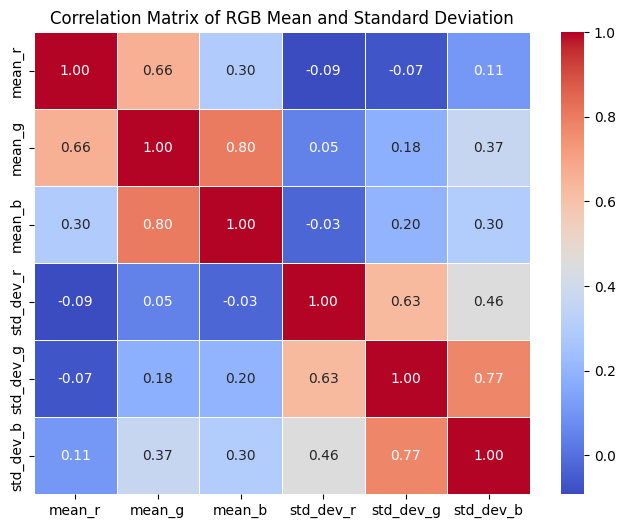

In [46]:
graphic.show_samples(train_set, features_set)

stats_df = features_df[['mean_r', 'mean_g', 'mean_b', 'std_dev_r', 'std_dev_g', 'std_dev_b']]
graphic.show_channels(stats_df)
graphic.show_correlation(stats_df)

In [ ]:
pca_df = pd.DataFrame(processor.pca)
model = classify(pca_df, features_df['label'])

Model trained successfully.
Accuracy: 0.9874

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       294
           1       1.00      0.95      0.98       104

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.99      0.99      0.99       398

Confusion Matrix:
[[294   0]
 [  5  99]]
